In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading from CSV File and Storing in Dataframe
X = pd.read_csv('../../Dataset/x_train_all.csv')
y = pd.read_csv('../../Dataset/y_train_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("Shape of X is  :", X.shape)
print("Shape of y is  :", y.shape)
print("========================================")

Shape of X is  : (9690, 2304)
Shape of y is  : (9690, 1)


In [4]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (7752, 2304)
= Shape of y_train is  : (7752, 1)
= Shape of X_test is   : (1938, 2304)
= Shape of y_test is   : (1938, 1)


In [6]:
#Scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
4180,0.184314,0.180392,0.176471,0.164706,0.156863,0.145098,0.141176,0.137255,0.133333,0.125490,...,0.168627,0.168627,0.168627,0.168627,0.164706,0.160784,0.160784,0.164706,0.164706,0.164706
9168,0.141176,0.137255,0.129412,0.117647,0.094118,0.090196,0.090196,0.086275,0.094118,0.098039,...,0.086275,0.086275,0.098039,0.094118,0.090196,0.086275,0.082353,0.082353,0.082353,0.082353
3739,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.200000,0.188235,0.168627,0.152941,0.149020,0.141176,0.137255,0.137255,0.141176,0.141176
9648,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.980392,0.705882,0.529412,0.298039,0.200000,0.156863,0.168627,0.356863,0.596078,0.462745
9332,0.890196,0.886275,0.890196,0.882353,0.878431,0.878431,0.886275,0.894118,0.901961,0.878431,...,0.258824,0.250980,0.337255,0.356863,0.286275,0.250980,0.231373,0.223529,0.231373,0.239216


In [8]:
#Creating the object of model and fitting the data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [9]:
#Predicting the test data
y_pred = nb_classifier.predict(X_test)

In [10]:
#Printing the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("========================================")
print("Accuracy Score :", accuracy)
print("========================================")


Accuracy Score : 0.3715170278637771


Text(0.5, 1.0, 'Confusion Matrix')

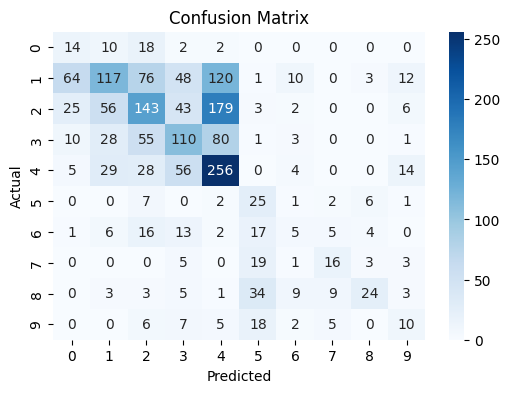

In [11]:
#Printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [12]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)


In [13]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})

In [14]:
df

,Precision,F1 Score,Recall
0,0.117647,0.169697,0.304348
1,0.469880,0.334286,0.259424
2,0.406250,0.353523,0.312910
3,0.380623,0.381282,0.381944
4,0.395672,0.492782,0.653061
5,0.211864,0.308642,0.568182
6,0.135135,0.094340,0.072464
7,0.432432,0.380952,0.340426
8,0.600000,0.366412,0.263736
9,0.200000,0.194175,0.188679


In [15]:
#Generating classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.12      0.30      0.17        46
           1       0.47      0.26      0.33       451
           2       0.41      0.31      0.35       457
           3       0.38      0.38      0.38       288
           4       0.40      0.65      0.49       392
           5       0.21      0.57      0.31        44
           6       0.14      0.07      0.09        69
           7       0.43      0.34      0.38        47
           8       0.60      0.26      0.37        91
           9       0.20      0.19      0.19        53

    accuracy                           0.37      1938
   macro avg       0.33      0.33      0.31      1938
weighted avg       0.40      0.37      0.36      1938

